Đây là thuật toán trực quan hóa dữ liệu nhiều chiều mạnh mẽ nhất, được dùng khắp nơi trong nghiên cứu và công nghiệp để biểu diễn dữ liệu phức tạp trên 2D/3D — đặc biệt hiệu quả với ảnh, văn bản, embedding.

Mình sẽ trình bày theo đúng phong cách bạn yêu thích:

🔹 1. Nguyên lý hoạt động (không công thức nặng!)
🎯 Mục tiêu:
Giữ nguyên "mối quan hệ láng giềng" của các điểm khi chiếu từ không gian nhiều chiều xuống 2D/3D.

💡 Không giống PCA (giữ phương sai toàn cục),
t-SNE tập trung vào cấu trúc cục bộ:
→ "Ai là hàng xóm của ai?" quan trọng hơn "khoảng cách tuyệt đối". 

🧠 Ý tưởng chính — “Giữ bạn bè gần nhau!”
Trong không gian gốc (nhiều chiều):
Với mỗi điểm, tính xác suất nó "kết bạn" với các điểm khác (dựa trên khoảng cách).
Điểm gần → xác suất cao; điểm xa → xác suất rất thấp.
Trong không gian 2D:
Ban đầu đặt các điểm ngẫu nhiên.
Điều chỉnh vị trí sao cho xác suất "kết bạn" trong 2D ≈ xác suất trong không gian gốc.
Dùng gradient descent để tối ưu vị trí 2D.
🔍 Đặc điểm nổi bật:
Bảo toàn cụm: các nhóm trong dữ liệu gốc → cụm rõ ràng trong 2D.
Tách biệt tốt: các lớp khác nhau → xa nhau trong hình.
Không giữ khoảng cách toàn cục:
→ Khoảng cách giữa hai cụm trong t-SNE không có ý nghĩa!
→ Chỉ trong cụm là đáng tin.
✅ Ưu điểm:
Trực quan hóa xuất sắc — thường dùng để kiểm tra chất lượng embedding (word2vec, BERT, CNN features...).
Xử lý tốt phi tuyến.
Phát hiện cụm ẩn dù không dùng thuật toán phân cụm.
❌ Hạn chế:
Rất chậm với dữ liệu lớn (>10k điểm).
Không xác định: chạy lại → kết quả khác (do khởi tạo ngẫu nhiên).
Không dùng để huấn luyện mô hình (chỉ để trực quan hóa!).
Không giữ cấu trúc toàn cục → không so sánh khoảng cách giữa cụm.


 3. Khi nào dùng t-SNE?
Trực quan hóa dữ liệu nhiều chiều
(embedding, features...)
Dữ liệu
rất lớn
(>50k điểm) → dùng
UMAP
thay thế
Kiểm tra chất lượng mô hình nhúng
(word2vec, BERT, CNN)
Cần
giữ khoảng cách toàn cục
(dùng PCA hoặc UMAP)
Khám phá cụm ẩn
trong dữ liệu
Dùng làm
đầu vào cho mô hình ML
(t-SNE không bảo toàn khoảng cách tuyệt đối!)
Trình bày kết quả
trong báo cáo, paper
Cần
kết quả xác định
(t-SNE ngẫu nhiên → luôn đặt
random_state
)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


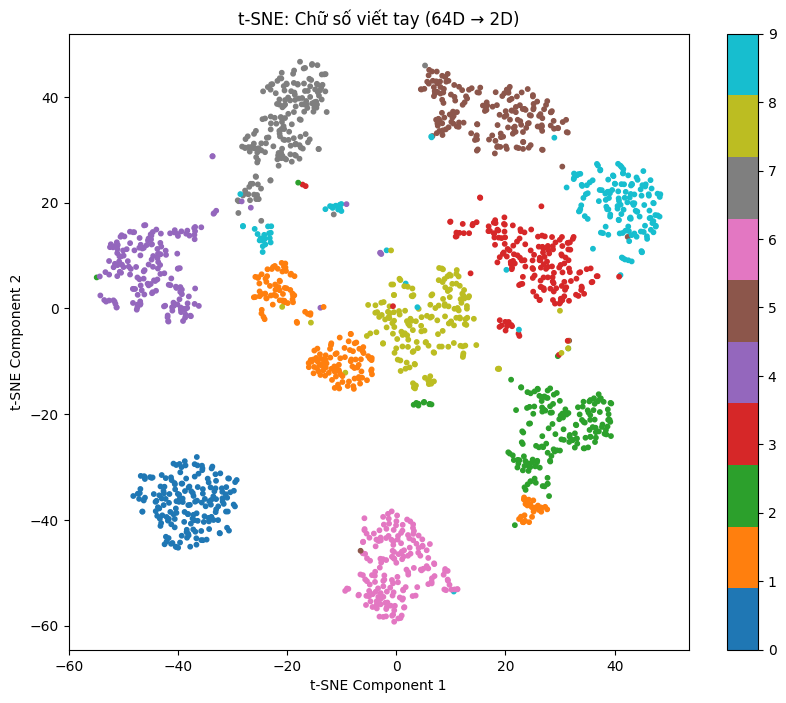

✅ t-SNE đã chạy thành công!
🔍 Dữ liệu ban đầu: 64 chiều → t-SNE: 2 chiều


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Tải dữ liệu chữ số viết tay (8x8 = 64 chiều)
digits = load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target

# Chuẩn hóa (không bắt buộc với t-SNE, nhưng nên làm)
X_scaled = StandardScaler().fit_transform(X)

# Áp dụng t-SNE (giảm từ 64D → 2D)
tsne = TSNE(
    n_components=2,
    perplexity=30,      # ~ số hàng xóm, thường 5-50
    learning_rate=200,  # mặc định thường ổn
    n_iter=1000,
    random_state=42     # để kết quả ổn định
)
X_tsne = tsne.fit_transform(X_scaled)

# Vẽ kết quả
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', s=10)
plt.colorbar(scatter)
plt.title('t-SNE: Chữ số viết tay (64D → 2D)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

print("✅ t-SNE đã chạy thành công!")
print(f"🔍 Dữ liệu ban đầu: {X.shape[1]} chiều → t-SNE: {X_tsne.shape[1]} chiều")